# RoboGarden Bootcamp Week 6 RNN Mission

### We will use an RNN to predict the next word based on previous word(s). 
### We will use parts of text from Shakespeare to train the network.

In [1]:
#Import General Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import livelossplot
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1  Create a new text file using your preferred text editor, e.g. Notepad.
    #File name: data.txt
    #Copy the file content from this link

In [2]:
with open('data.txt', 'r') as file:      #read file into "text", split into lines on '\n' with lower case
    text = file.read()
    lines = text.lower().split('\n')

### Step 2:  Tokenize with  text_to_words_sequence() and Tokenizer():

In [3]:
from keras.preprocessing.text import text_to_word_sequence, Tokenizer   # import fuctions
words = text_to_word_sequence(text)                                     # get words from text, remove punctuation 
                                                                        # & make all words lower case
tokenizer = Tokenizer()                                                 
tokenizer.fit_on_texts(words)                                           # convert words to tokens
vocabulary_size = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(lines)                         # convert lines to sequences of tokens

subsequences = []                                                       # create subsequences from the sequences
for sequence in sequences:                                              # from 1 word to the size of the sequence
    for i in range(1, len(sequence)):
        subsequence = sequence[:i+1]
        subsequences.append(subsequence)

from keras.preprocessing.sequence import pad_sequences                  # pad the subsequences with zeros so they
sequence_length = max([len(sequence) for sequence in sequences])                # are all the same length
sequences = pad_sequences(subsequences, maxlen=sequence_length, padding='pre')  # "pre" pads zeros at the front

from keras.utils import to_categorical                                  # split into x and y with x being all words 
x, y = sequences[:,:-1],sequences[:,-1]                                 # in a sequence, except the last word and 
y = to_categorical(y, num_classes=vocabulary_size)                      # y is the last word

Using TensorFlow backend.


### Step 3:  Define an RNN with the following layers:

    An embedding layer with the following parameters:
        The input dimension is vocabulary_size.   The output dimension is 100.   The input length is sequence_length - 1
    
    An LSTM layer with 100 units
    
    A dropout layer with a dropout rate of 10%
    
    A dense layer with parameters:  The activation function is softmax.  The number of units is vocabulary_size

In [4]:
# Step3:  Initialize the model & build it
from keras.models import Sequential
model = Sequential()

In [5]:
# Add the Embedding Layer The input layer is an embedding layer where:

    #The input dimension is vocabulary_size
    #The output dimension is 10
    #The input length is sequence_length - 1
    
from keras.layers import Embedding
model.add(Embedding(vocabulary_size, 100, input_length = sequence_length -1))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# Add an LSTM layer with 100 units
from keras.layers import LSTM
model.add(LSTM(100))

In [7]:
# Add a Dropout layer with 10% dropout
from keras.layers import Dropout
model.add(Dropout(0.1))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
#  Add output layer that is a fully-connected layer with softmax activation function 
# and output units are equal to the vocabulary size
from keras.layers import Dense
model.add(Dense(units = vocabulary_size, activation = 'softmax'))

### Step 4: complile the model with loss as "categorical crossentropy", "accuracy" for metrics, and "adam" to optimize

In [9]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Step 5:  Fit and train model for 500 epochs per the Mission description.

In [10]:
live_plot = livelossplot.PlotLossesKeras()

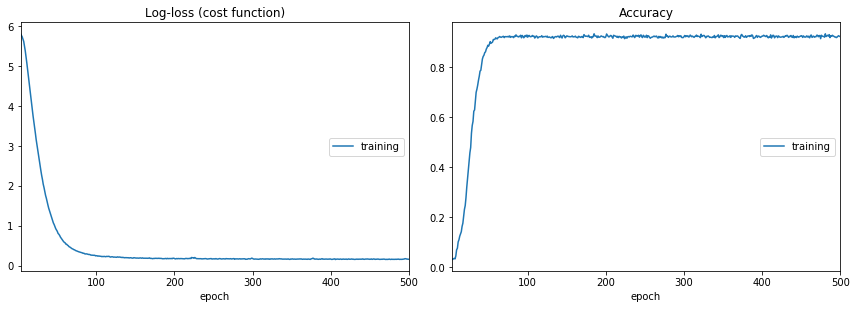

Log-loss (cost function):
training   (min:    0.151, max:    6.285, cur:    0.157)

Accuracy:
training   (min:    0.021, max:    0.935, cur:    0.924)


In [11]:
# Train for 500 epochs
model.fit(x, y,callbacks = [live_plot], epochs = 500)

In [12]:
# Test the RNN after 500 epochs
scores = model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 93.12%


In [13]:
# Save the model
model.save("Week_6_Mission_RNN_text_WS_model.h5")
print("Saved model to disk")

Saved model to disk


### 500 epochs was excessive for this run.  A run of about 200 may have been a better choice or use early stopping.